## Understanding the Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("housing.csv") 
ds=df.copy()

In [3]:
ds.shape

(4600, 18)

In [4]:
set(ds)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

In [5]:
ds.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
ds.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [8]:
ds.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [9]:
print("Total No of Missing Values :",ds.isnull().sum().sum())

Total No of Missing Values : 134


## Cleaning the Dataset
## 1. Handle missing values

In [10]:
print("No of Duplicates :",ds.duplicated().sum())

No of Duplicates : 0


In [11]:
ds["sqft_living"] = ds["sqft_living"].fillna(ds["sqft_living"].median())
ds["sqft_lot"] = ds["sqft_lot"].fillna(ds["sqft_lot"].median())

In [12]:
city_grp = ds.groupby('statezip')['city'].unique()
city_grp

statezip
WA 98001                        [Auburn, Algona, Federal Way]
WA 98002                                             [Auburn]
WA 98003                                   [nan, Federal Way]
WA 98004    [Bellevue, Clyde Hill, Yarrow Point, Beaux Art...
WA 98005                                           [Bellevue]
                                  ...                        
WA 98188                                    [SeaTac, Tukwila]
WA 98198             [nan, Des Moines, SeaTac, Normandy Park]
WA 98199                                       [nan, Seattle]
WA 98288                                          [Skykomish]
WA 98354                                             [Milton]
Name: city, Length: 77, dtype: object

In [13]:
city_map = ds.groupby('statezip')['city'].agg(lambda x: x.mode()[0])
ds['city'] = ds['city'].fillna(ds['statezip'].map(city_map))

In [14]:
ds.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [15]:
ds["yr_built"]=ds["yr_built"].fillna(ds["yr_built"].median())

In [16]:
ds.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## 2. Fix Formatting & Detect Inconsistencies

In [17]:
ds['date'] = ds['date'].astype(str).str.strip()


In [18]:
print(ds['date'].unique()[:20])

['02/05/2014 0:00' '03/05/2014 0:00' '04/05/2014 0:00' '05/05/2014 0:00'
 '06/05/2014 0:00' '07/05/2014 0:00' '08/05/2014 0:00' '09/05/2014 0:00'
 '10/05/2014 0:00' '11/05/2014 0:00' '12/05/2014 0:00' '13/05/2014 0:00'
 '14/05/2014 0:00' '15/05/2014 0:00' '16/05/2014 0:00' '17/05/2014 0:00'
 '18/05/2014 0:00' '19/05/2014 0:00' '20/05/2014 0:00' '21/05/2014 0:00']


In [19]:
#Date
from datetime import datetime
ds['date'] = pd.to_datetime(ds['date'], format='%d/%m/%Y %H:%M', errors='coerce')
ds['date'] = ds['date'].dt.date

In [20]:
#Objects or String
ds['city'] = ds['city'].str.title().str.strip()
ds['street'] = ds['street'].str.title().str.strip()
ds['statezip'] = ds['statezip'].str.upper().str.strip()
ds['country'] = ds['country'].str.upper().str.strip()
ds.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340.0,7683.5,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650.0,7683.5,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930.0,7683.5,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143Rd Ave Se,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000.0,7683.5,1.0,0,0,4,1000,1000,1963.0,0,857 170Th Pl Ne,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940.0,7683.5,1.0,0,0,4,1140,800,1976.0,1992,9105 170Th Ave Ne,Redmond,WA 98052,USA


In [21]:
print("Minimum Floors :",ds['floors'].min())
print("Maximum Floors :",ds['floors'].max())

Minimum Floors : 1.0
Maximum Floors : 3.5


In [22]:
# Logical validation
ds = ds[ds['bedrooms'] >= 1]
ds = ds[ds['bathrooms'] >= 0.5]
ds = ds[ds['condition'].between(1, 5)]
ds = ds[ds['view'].between(0, 4)]
ds = ds[ds['floors'].between(1.0, 3.5)]
ds = ds[ds['waterfront'].isin([0, 1])]
ds.tail() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09,308166.6667,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0,1976.0,1979,501 N 143Rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.3333,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0,1976.0,2009,14855 Se 10Th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.1667,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0,1976.0,0,759 Ilwaco Pl Ne,Renton,WA 98059,USA
4598,2014-07-10,203400.0000,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020,1976.0,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10,220600.0000,3,2.50,1490.0,8102.0,2.0,0,0,4,1490,0,1976.0,0,18717 Se 258Th St,Covington,WA 98042,USA


In [23]:
ds.shape

(4598, 18)

## Invalid Values

In [24]:
ds[ds['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05,0.0,3,1.75,1490.0,10125.0,1.0,0,0,4,1490,0,1962.0,0,3911 S 328Th St,Federal Way,WA 98001,USA
4356,2014-05-05,0.0,4,2.75,2600.0,5390.0,1.0,0,0,4,1300,1300,1960.0,2001,2120 31St Ave W,Seattle,WA 98199,USA
4357,2014-05-05,0.0,6,2.75,3200.0,9200.0,1.0,0,2,4,1600,1600,1953.0,1983,12271 Marine View Dr Sw,Burien,WA 98146,USA
4358,2014-05-06,0.0,5,3.50,3480.0,36615.0,2.0,0,0,4,2490,990,1983.0,0,21809 Se 38Th Pl,Issaquah,WA 98075,USA
4361,2014-05-07,0.0,5,1.50,1500.0,7112.0,1.0,0,0,5,760,740,1920.0,0,14901-14999 12Th Ave Sw,Burien,WA 98166,USA
4362,2014-05-07,0.0,4,4.00,3680.0,18804.0,2.0,0,0,3,3680,0,1990.0,2009,1223-1237 244Th Ave Ne,Sammamish,WA 98074,USA
4374,2014-05-09,0.0,2,2.50,2200.0,188200.0,1.0,0,3,3,2200,0,2007.0,0,39612 254Th Ave Se,Enumclaw,WA 98022,USA
4376,2014-05-09,0.0,4,2.25,2170.0,10500.0,1.0,0,2,4,1270,900,1960.0,2001,216 Sw 183Rd St,Normandy Park,WA 98166,USA
4382,2014-05-12,0.0,5,4.50,4630.0,6324.0,2.0,0,0,3,3210,1420,2006.0,0,6925 Oakmont Ave Se,Snoqualmie,WA 98065,USA
4383,2014-05-13,0.0,5,4.00,4430.0,9000.0,2.0,0,0,3,4430,0,2013.0,1923,9235 Ne 5Th St,Bellevue,WA 98004,USA


In [25]:
print("No of Rows where price = 0 :",ds[ds['price'] == 0].shape[0])

No of Rows where price = 0 : 49


In [26]:
ds['total_sqft'] = ds['sqft_living'] + ds['sqft_basement']

In [27]:
#Price Assumption
pr = ds['price'].mean()
tot_sqft = ds['total_sqft'].mean()
one_sqfeet = pr/tot_sqft
print("AVG PRICE OF PER SQUARE FEET = ",one_sqfeet)

AVG PRICE OF PER SQUARE FEET =  226.0808650825318


In [28]:
ds.loc[ds['price'] == 0, 'price'] = ds['total_sqft'] * one_sqfeet
ds['price']=ds['price'].astype(int)

In [29]:
print("No of Rows where price = 0 :",ds[ds['price'] == 0].shape[0])

No of Rows where price = 0 : 0


In [30]:
print("Minimun of year built :",ds['yr_built'].min())

Minimun of year built : 1900.0


In [31]:
#year
current_year = datetime.now().year
ds = ds[ds['yr_built'].between(1900, current_year)]
ds['yr_built'] = ds['yr_built'].round(0).astype(int)
ds.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
0,2014-05-02,313000,3,1.5,1340.0,7683.5,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1340.0
1,2014-05-02,2384000,5,2.5,3650.0,7683.5,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3930.0
2,2014-05-02,342000,3,2.0,1930.0,7683.5,1.0,0,0,4,1930,0,1966,0,26206-26214 143Rd Ave Se,Kent,WA 98042,USA,1930.0


In [32]:
ds['sqft_basement'] = ds['sqft_living'] - ds['sqft_above']
ds[['sqft_living','sqft_above','sqft_basement']].head(10)

,sqft_living,sqft_above,sqft_basement
0,1340.0,1340,0.0
1,3650.0,3370,280.0
2,1930.0,1930,0.0
3,2000.0,1000,1000.0
4,1940.0,1140,800.0
5,880.0,880,0.0
6,1350.0,1350,0.0
7,2710.0,2710,0.0
8,2430.0,1570,860.0
9,1520.0,1520,0.0


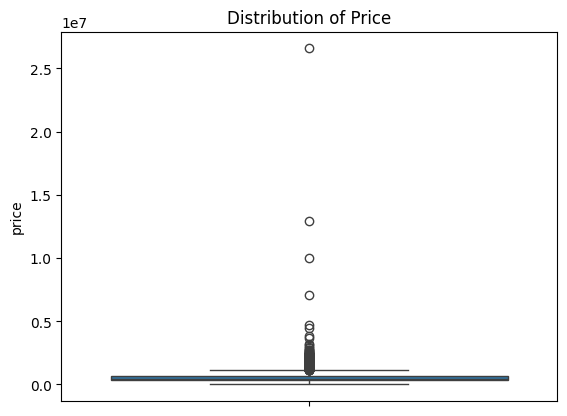

In [33]:
#Finding Outliers
sns.boxplot(ds['price'])
plt.title("Distribution of Price")
plt.show()

In [34]:
ds[ds['price']>=10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
8,2014-05-02,10000000,3,2.5,2430.0,7683.5,1.0,0,0,4,1570,860.0,1985,0,46611-46625 Se 129Th St,North Bend,WA 98045,USA,3290.0
4346,2014-06-23,12899000,3,2.5,2190.0,11394.0,1.0,0,0,3,1550,640.0,1956,2001,5426 40Th Ave W,Seattle,WA 98199,USA,2830.0
4350,2014-07-03,26590000,3,2.0,1180.0,7793.0,1.0,0,0,4,1180,0.0,1992,0,12005 Se 219Th Ct,Kent,WA 98031,USA,1180.0


In [35]:
#Statistical Detection Using IQR Method
Q1 = ds['price'].quantile(0.25)
Q3 = ds['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Calculate median price
median_price = ds['price'].median()

# Detect outliers
outliers = ds[(ds['price'] < lower_bound) | (ds['price'] > upper_bound)]
outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_sqft
1,2014-05-02,2384000,5,2.50,3650.0,7683.5,2.0,0,4,5,3370,280.0,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3930.0
8,2014-05-02,10000000,3,2.50,2430.0,7683.5,1.0,0,0,4,1570,860.0,1985,0,46611-46625 Se 129Th St,North Bend,WA 98045,USA,3290.0
11,2014-05-02,1400000,4,2.50,2920.0,7683.5,1.5,0,0,5,1910,1010.0,1909,1988,3838-4098 44Th Ave Ne,Seattle,WA 98105,USA,3930.0
14,2014-05-02,1200000,5,2.75,2910.0,9480.0,1.5,0,0,3,2910,0.0,1939,1969,3534 46Th Ave Ne,Seattle,WA 98105,USA,2910.0
99,2014-05-05,1395000,5,3.50,4010.0,8510.0,2.0,0,1,5,2850,1160.0,1971,0,3930 Ne Belvoir Pl,Seattle,WA 98105,USA,5170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,2014-06-06,1337044,4,3.50,4280.0,9583.0,2.0,0,0,3,4280,0.0,2005,0,1415 108Th Ave Se,Bellevue,WA 98004,USA,4280.0
4523,2014-06-23,1519263,3,4.50,5230.0,17826.0,2.0,1,4,3,3740,1490.0,2005,0,7455 W Mercer Way,Mercer Island,WA 98040,USA,6720.0
4528,2014-06-24,1469525,4,5.00,4550.0,18641.0,1.0,1,4,3,2600,1950.0,2002,0,425 E Lake Sammamish Pkwy Se,Sammamish,WA 98074,USA,6500.0
4572,2014-07-02,1288333,6,4.50,3830.0,4800.0,3.0,0,0,3,3050,780.0,1919,2004,2425 3Rd Ave W,Seattle,WA 98119,USA,4610.0


In [36]:
# Replace only prices greater than 10,000,000
ds.loc[ds['price'] >= 10000000, 'price'] = median_price

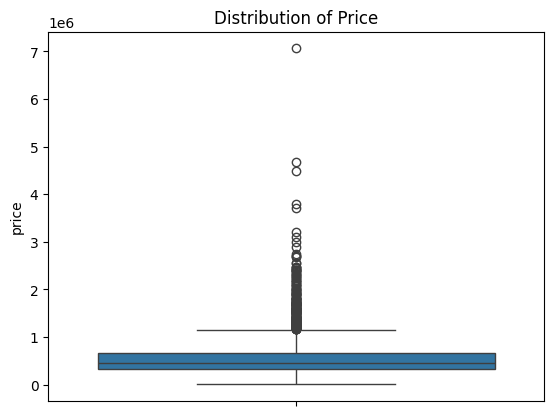

In [37]:
sns.boxplot(ds['price'])
plt.title("Distribution of Price")
plt.show()

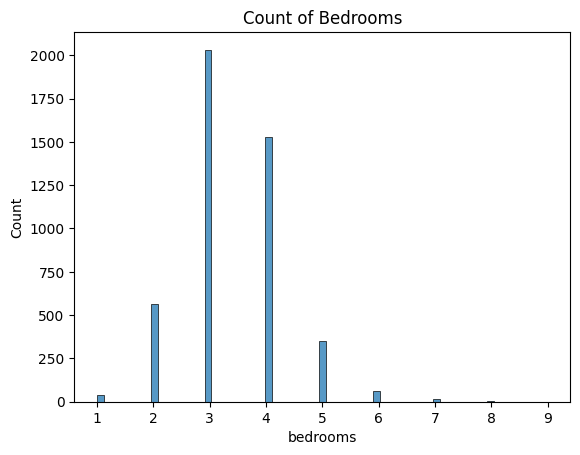

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


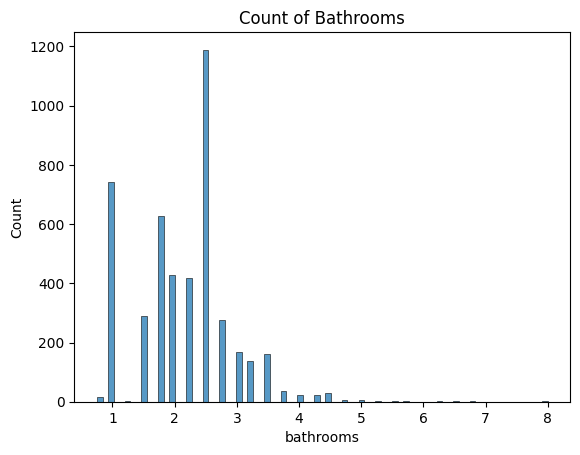

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


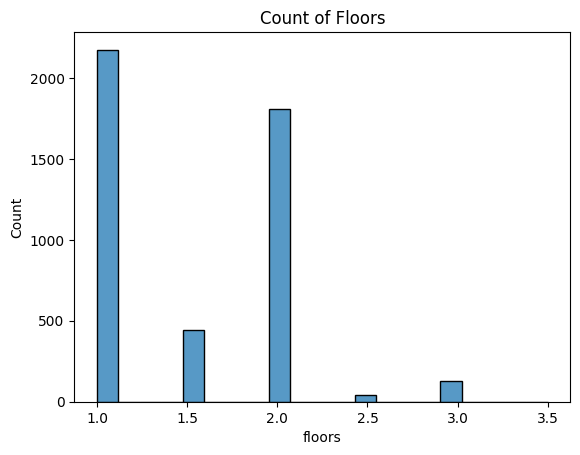

In [38]:
#Finding Outliers For Bedroom
sns.histplot(x='bedrooms', data=ds)
plt.title("Count of Bedrooms")
plt.show()

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Finding Outliers For Bathrooms
sns.histplot(x='bathrooms', data=ds)
plt.title("Count of Bathrooms")
plt.show()

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#Finding Outliers For Floors
sns.histplot(x='floors', data=ds)
plt.title("Count of Floors")
plt.show()



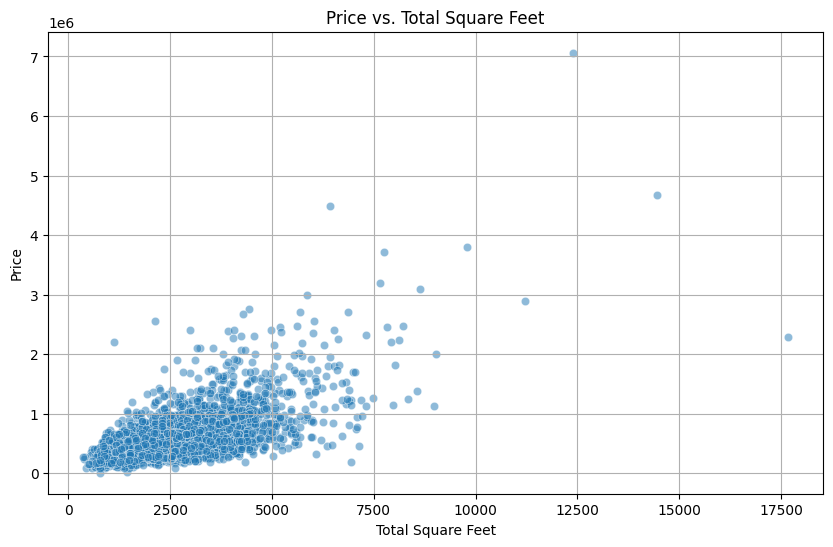

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=ds, alpha=0.5)
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [40]:
ds.shape

(4598, 19)

## EDA Data Visualization
## 1. Univariate Analysis

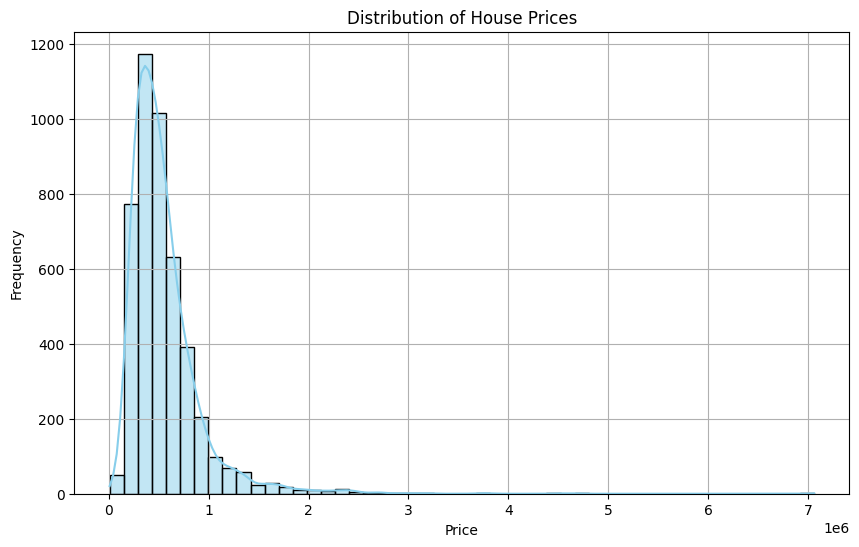

In [41]:
# Histogram of price
plt.figure(figsize=(10, 6))
sns.histplot(ds['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

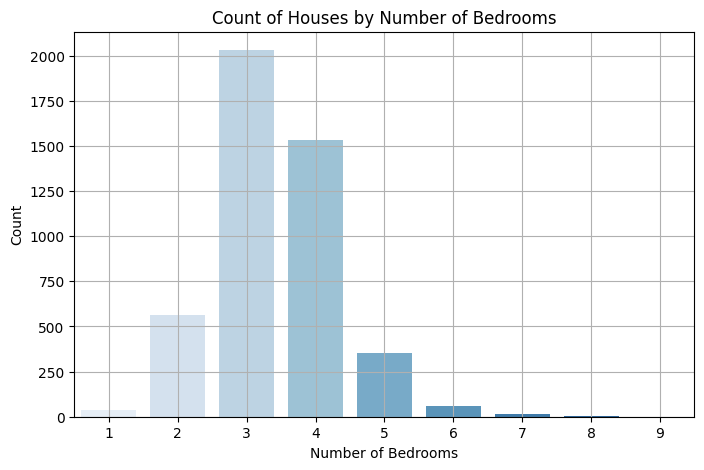

In [42]:
# Countplot of number of bedrooms
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=ds, palette='Blues')
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()


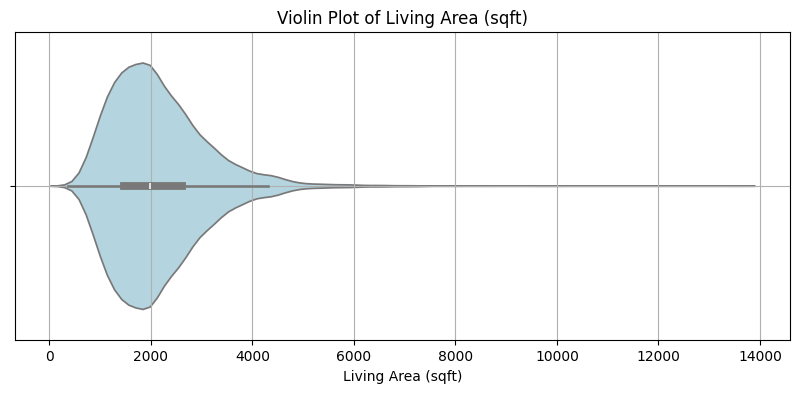

In [43]:
plt.figure(figsize=(10, 4))
sns.violinplot(x=ds['sqft_living'], color='lightblue')
plt.title('Violin Plot of Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.grid(True)
plt.show()


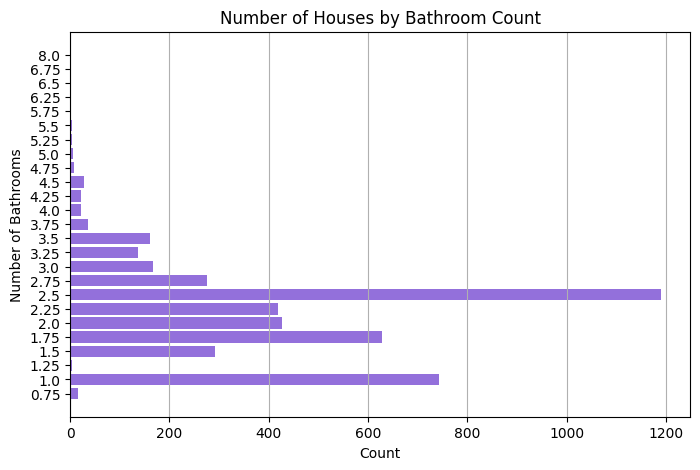

In [44]:
# Count number of houses by bathroom
bathroom_counts = ds['bathrooms'].value_counts().sort_index()

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(bathroom_counts.index.astype(str), bathroom_counts.values, color='mediumpurple')
plt.title('Number of Houses by Bathroom Count')
plt.xlabel('Count')
plt.ylabel('Number of Bathrooms')
plt.grid(axis='x')
plt.show()

## 2. Bivariate Analysis

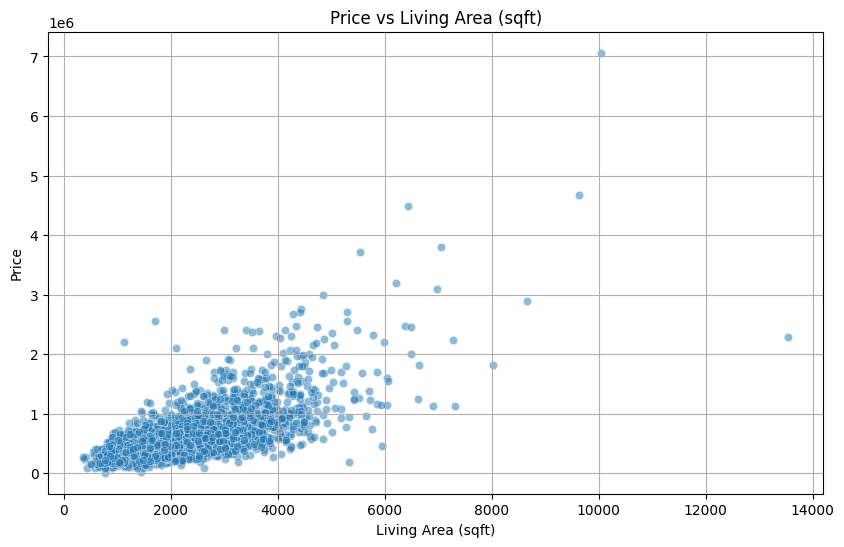

In [45]:
# Scatter plot  price vs Sqft Living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=ds, alpha=0.5)
plt.title('Price vs Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

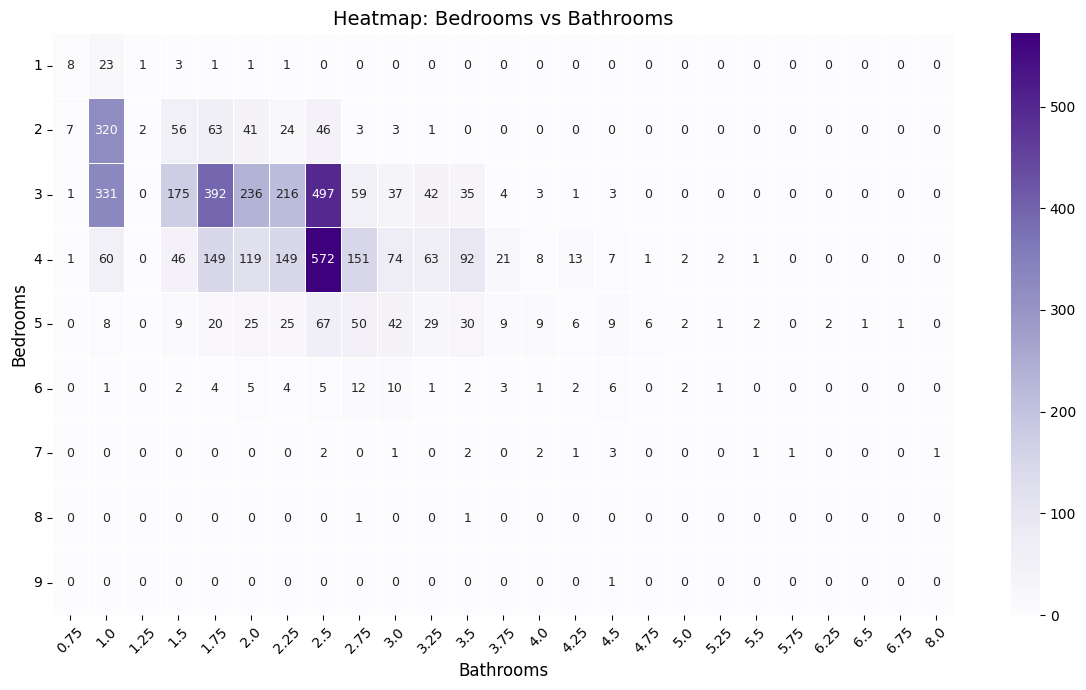

In [46]:
bed_bath = ds.groupby(['bedrooms', 'bathrooms']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
sns.heatmap(
    bed_bath,
    cmap='Purples',
    annot=True,
    fmt='d',
    linewidths=0.5,         
    linecolor='white',
    annot_kws={"size": 9}   
)

plt.title('Heatmap: Bedrooms vs Bathrooms', fontsize=14)
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Bedrooms', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 3. Multivariate Analysis

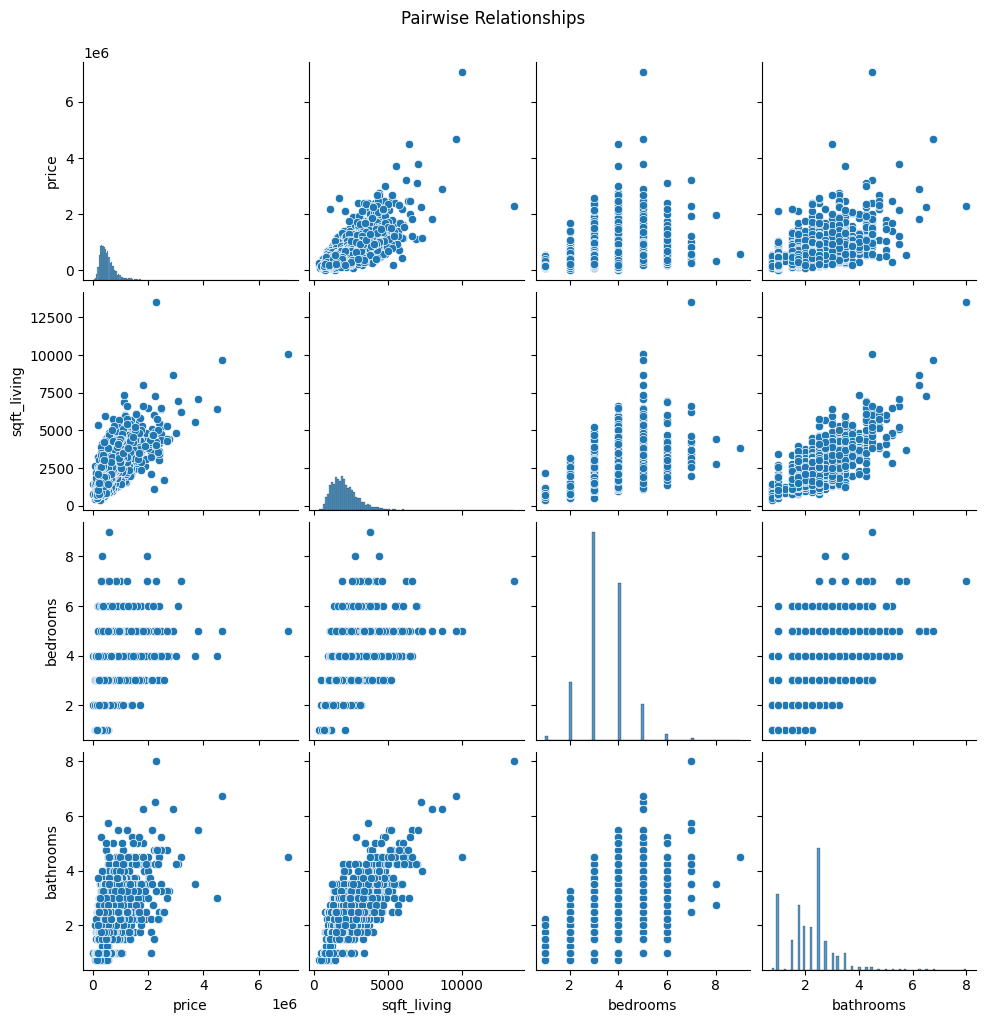

In [47]:
# Pairplot to see interactions
sns.pairplot(ds[['price', 'sqft_living', 'bedrooms', 'bathrooms']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

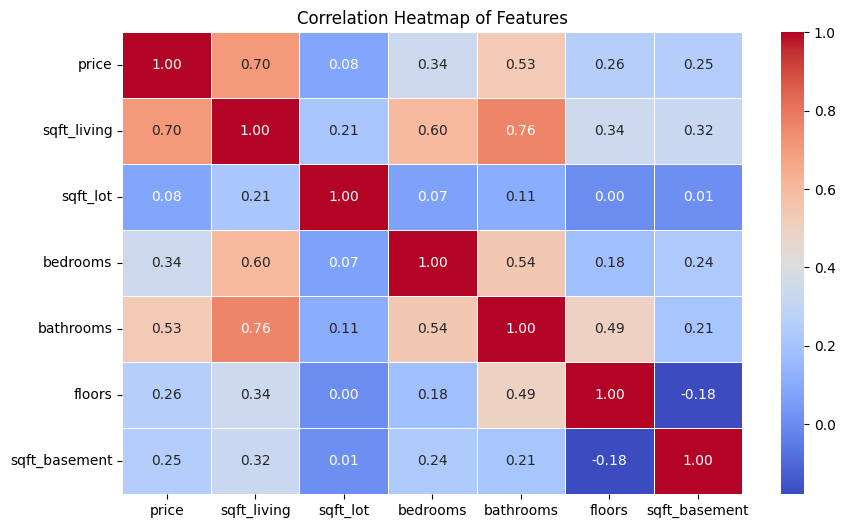

In [48]:
# Heatmap of correlation
plt.figure(figsize=(10, 6))
corr = ds[['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'sqft_basement']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

## Visualization

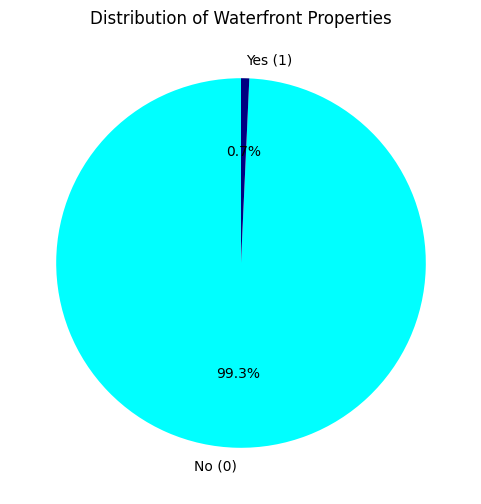

In [49]:
waterfront_counts = ds['waterfront'].value_counts().sort_index()
labels = ['No (0)', 'Yes (1)']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(waterfront_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['cyan', 'navy'])
plt.title('Distribution of Waterfront Properties')
plt.show()



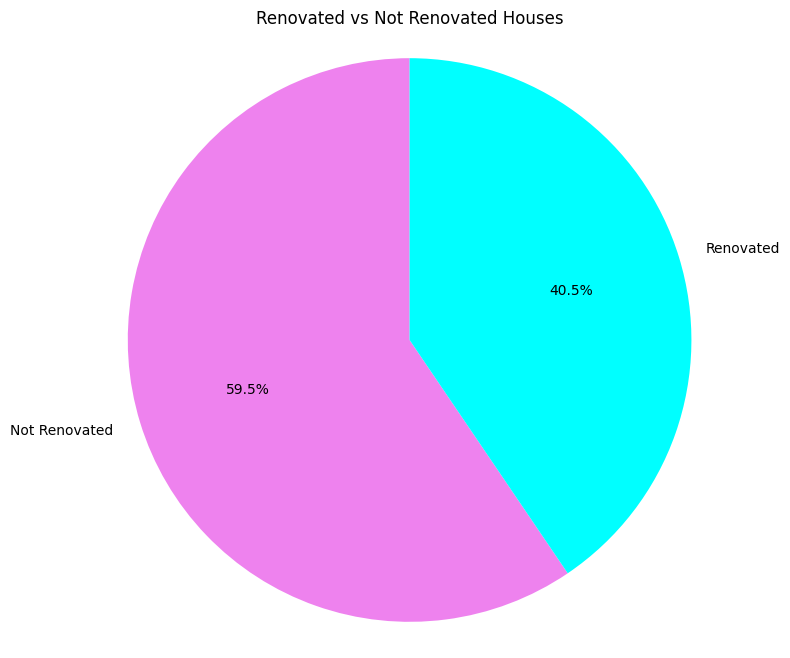

In [50]:
renovation_counts = [
    (ds['yr_renovated'] == 0).sum(),    # Not Renovated
    (ds['yr_renovated'] > 0).sum()      # Renovated
]

labels = ['Not Renovated', 'Renovated']

plt.figure(figsize=(8, 8))
plt.pie(
    renovation_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['violet', 'cyan']
)
plt.title('Renovated vs Not Renovated Houses')
plt.axis('equal')
plt.show()

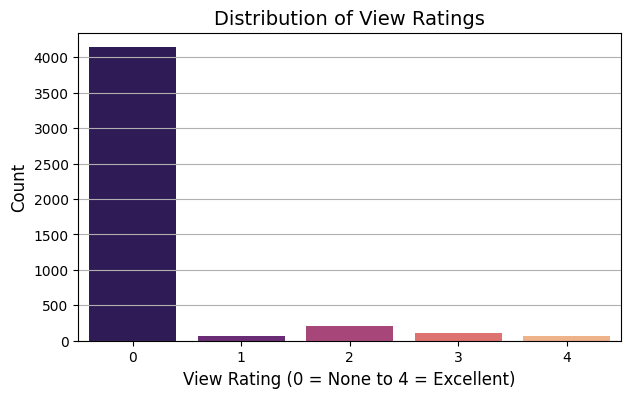

In [51]:
plt.figure(figsize=(7, 4))
sns.countplot(x='view', data=ds, palette='magma')
plt.title('Distribution of View Ratings', fontsize=14)
plt.xlabel('View Rating (0 = None to 4 = Excellent)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()


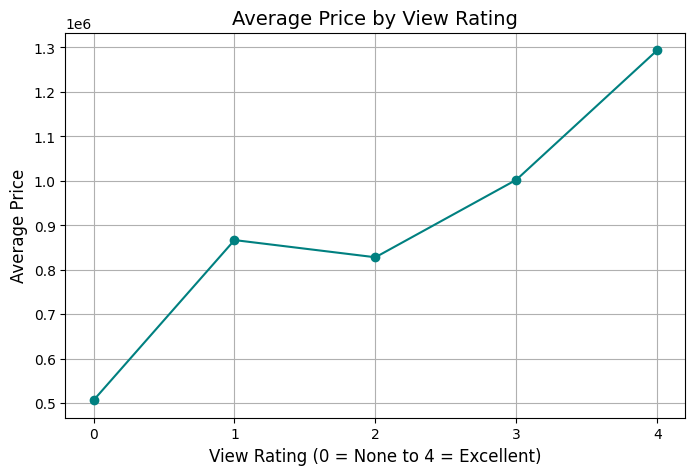

In [52]:
avg_price_by_view = ds.groupby('view')['price'].mean().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(avg_price_by_view.index, avg_price_by_view.values, marker='o', color='teal')
plt.title('Average Price by View Rating', fontsize=14)
plt.xlabel('View Rating (0 = None to 4 = Excellent)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(True)
plt.xticks(avg_price_by_view.index)
plt.show()



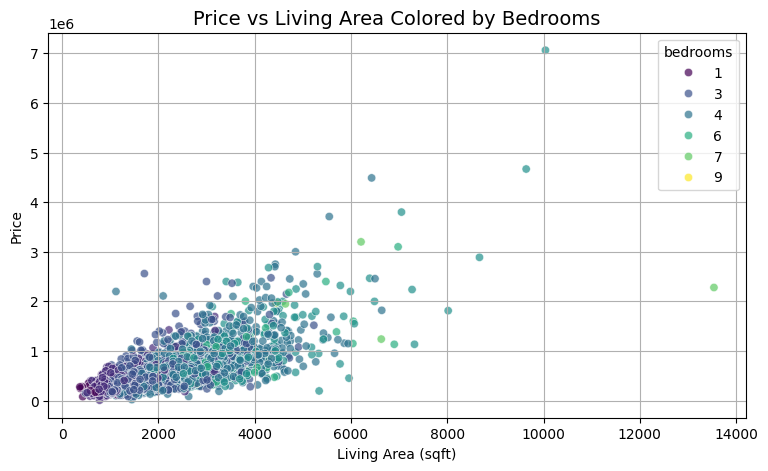

In [53]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x='sqft_living', y='price', data=ds, hue='bedrooms', palette='viridis', alpha=0.7)
plt.title('Price vs Living Area Colored by Bedrooms', fontsize=14)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


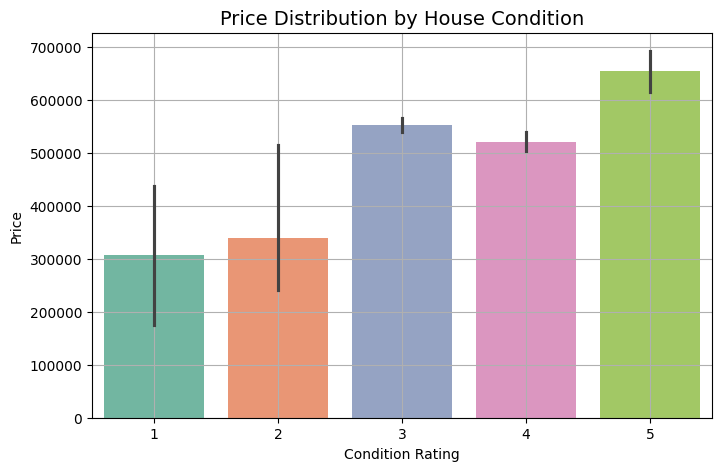

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x='condition', y='price', data=ds, palette='Set2')
plt.title('Price Distribution by House Condition', fontsize=14)
plt.xlabel('Condition Rating')
plt.ylabel('Price')
plt.grid(True)
plt.show()


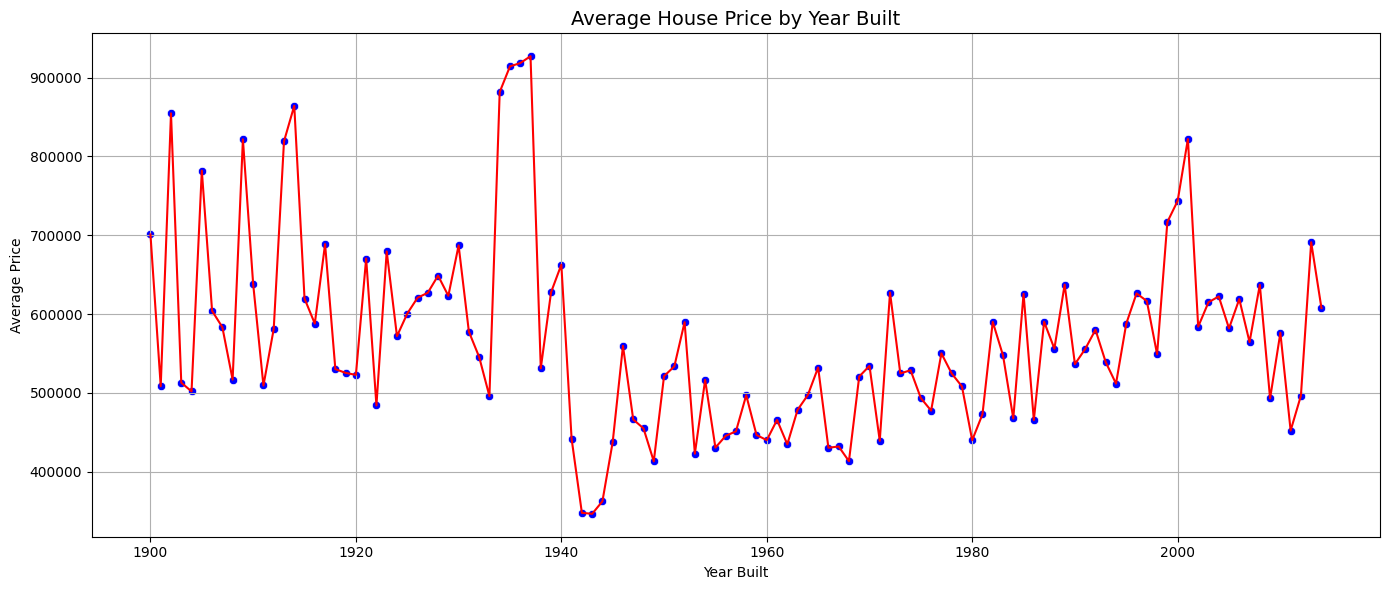

In [55]:
avg_price_by_year = ds.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.scatterplot(x='yr_built', y='price', data=avg_price_by_year, color='blue')
sns.lineplot(x='yr_built', y='price', data=avg_price_by_year, color='red')
plt.title('Average House Price by Year Built',fontsize=14)
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
ds[(ds['yr_built'] >= 1930) & (ds['yr_built'] <= 1940)][['price', 'yr_built','city']].sort_values(by='price', ascending=False)


,price,yr_built,city
2286,7062500,1940,Bellevue
3202,2466350,1940,Seattle
1543,2453500,1935,Seattle
3791,2367000,1930,Mercer Island
4143,2180000,1931,Seattle
...,...,...,...
4442,162778,1940,Seattle
4147,148000,1930,Seattle
2318,148000,1939,Seattle
3769,102500,1937,Seattle


In [57]:
ds[(ds['yr_built'] >= 1930) & (ds['yr_built'] <= 1945)]['city'].unique()

array(['Seattle', 'Burien', 'Kent', 'Maple Valley', 'Auburn', 'Seatac',
       'Duvall', 'Tukwila', 'Shoreline', 'Renton', 'Carnation',
       'Issaquah', 'Redmond', 'Federal Way', 'Lake Forest Park', 'Vashon',
       'Kirkland', 'Bellevue', 'Mercer Island', 'Normandy Park',
       'North Bend', 'Enumclaw', 'Black Diamond', 'Kenmore'], dtype=object)

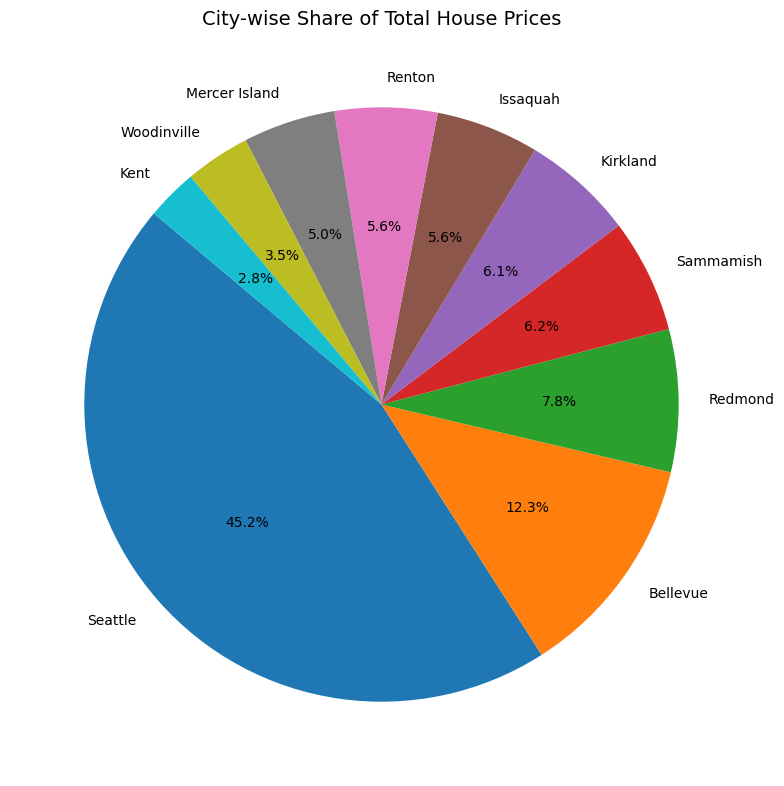

In [58]:
import matplotlib.pyplot as plt

city_price = ds.groupby('city')['price'].sum().sort_values(ascending=False).head(10)  # Top 10 cities

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(city_price, labels=city_price.index, autopct='%1.1f%%', startangle=140)

plt.title('City-wise Share of Total House Prices', fontsize=14)
plt.tight_layout()
plt.show()


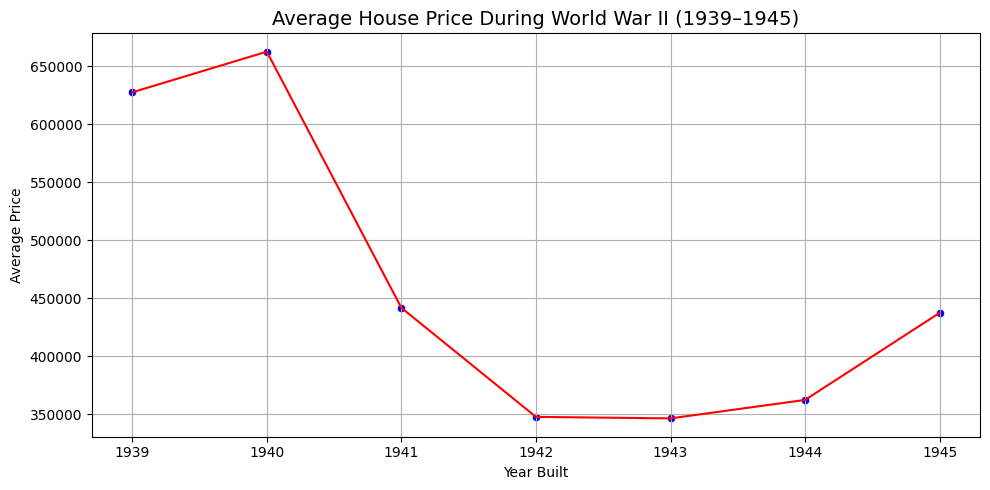

In [59]:
# Filter data for WWII period
ww2_data = ds[(ds['yr_built'] >= 1939) & (ds['yr_built'] <= 1945)]

# Group by year and calculate average price
avg_price_ww2 = ww2_data.groupby('yr_built')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.scatterplot(x='yr_built', y='price', data=avg_price_ww2, color='blue')
sns.lineplot(x='yr_built', y='price', data=avg_price_ww2, color='red')

plt.title('Average House Price During World War II (1939–1945)', fontsize=14)
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


### Before WWII (Price Increased)
1.Fewer, high-quality homes raised the average price

2.Built in premium or central locations (e.g., Seattle, Bellevue)

### After WWII (Price Dropped)
1.Mass production of affordable homes

2.Expansion into cheaper suburban areas

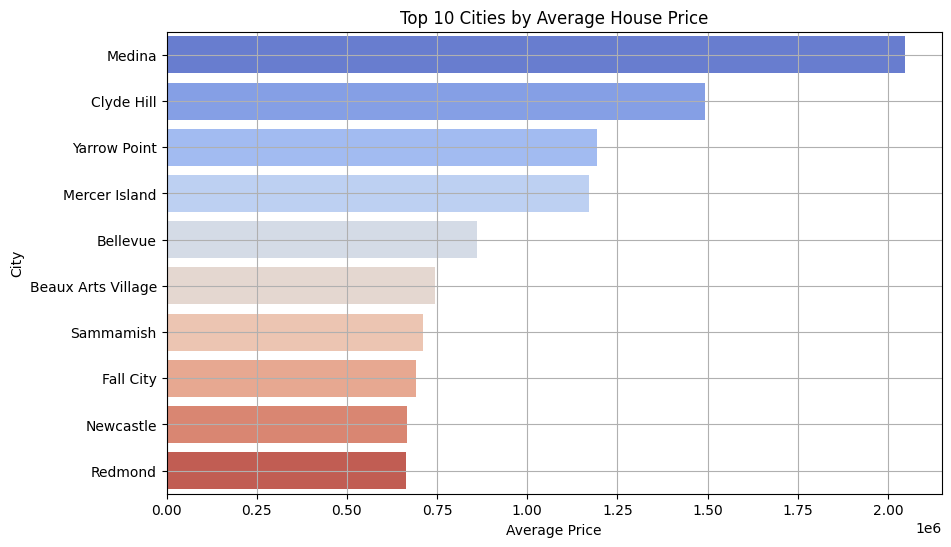

In [60]:
# Top 10 cities with highest average prices
top_cities = ds.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 10 Cities by Average House Price')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.grid(True)
plt.show()

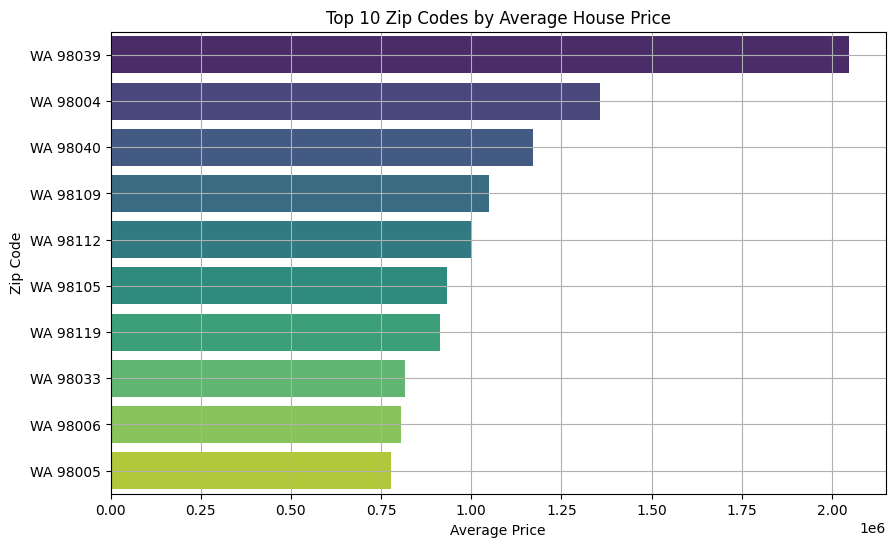

In [61]:
# Top 10 zip codes with highest average prices
top_zips = ds.groupby('statezip')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_zips.values, y=top_zips.index, palette='viridis')
plt.title('Top 10 Zip Codes by Average House Price')
plt.xlabel('Average Price')
plt.ylabel('Zip Code')
plt.grid(True)
plt.show()

## Feature Engineering

In [62]:
 #Age of the Property

In [63]:
import datetime
current_year = datetime.datetime.now().year
ds['property_age'] = current_year - ds['yr_built']

In [64]:
#Years after renovated
ds['renovated'] = ds['yr_renovated'].apply(lambda x: 0 if x == 0 else current_year - x)

In [65]:
#Price Per Sqfeet
ds['price_per_sqft'] = ds['price'] / ds['total_sqft']

In [66]:
# 1. Extract full bathrooms
ds['full_bathrooms'] = ds['bathrooms'].astype(int)

# 2. Extract fractional part
ds['bathroom_fraction'] = ds['bathrooms'] - ds['full_bathrooms']

# 3. One-hot encode known fractions
ds['quarter_bath'] = (ds['bathroom_fraction'] == 0.25).astype(int)
ds['half_bath'] = (ds['bathroom_fraction'] == 0.5).astype(int)
ds['three_quarter_bath'] = (ds['bathroom_fraction'] == 0.75).astype(int)


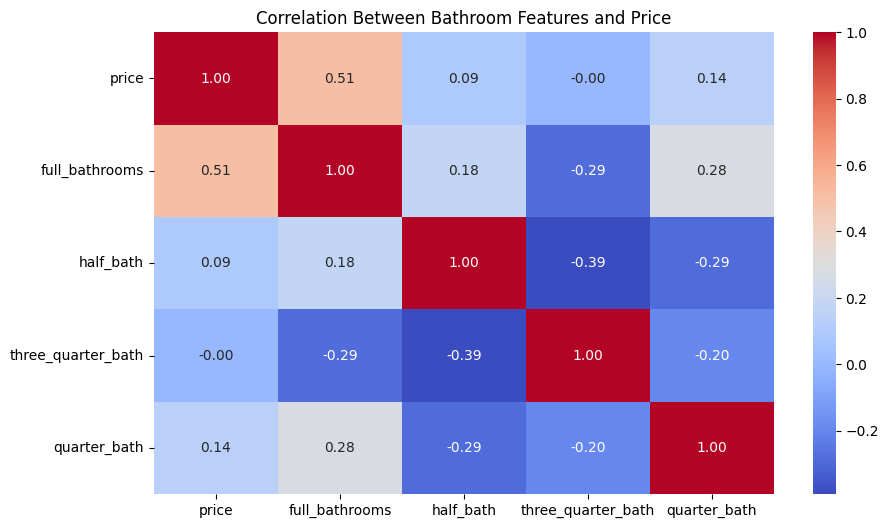

In [67]:
bath_features = ds[['price', 'full_bathrooms', 'half_bath', 'three_quarter_bath', 'quarter_bath']]

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bath_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Bathroom Features and Price")
plt.show()

#### Key Insights from heatmap:
 1. full_bathrooms has the strongest positive correlation with price (0.51)
This means houses with more full bathrooms tend to have significantly higher prices.

 2. quarter_bath shows a weak positive correlation with price (0.14)
Adds some value to the property, but not much.

 3. half_bath (0.09) and three_quarter_bath (-0.00) have minimal or no correlation with price
These have little to no influence on property price in your dataset.

three_quarter_bath even has a slight negative correlation, meaning more of them might slightly lower the price — possibly due to them being common in cheaper/older houses.

 4. Bathroom types are negatively correlated with each other
e.g., full_bathrooms vs three_quarter_bath: -0.29
Indicates if a house has more full baths, it’s less likely to have ¾ or half baths, and vice versa.


In [68]:
import numpy as np
ds['full_floor'] = np.floor(ds['floors']).astype(int)
ds['has_attic'] = (ds['floors'] % 1 != 0).astype(int)

In [69]:
ds[['price','total_sqft','price_per_sqft','property_age','full_bathrooms','full_floor','has_attic']].head()

,price,total_sqft,price_per_sqft,property_age,full_bathrooms,full_floor,has_attic
0,313000,1340.0,233.582090,70,1,1,1
1,2384000,3930.0,606.615776,104,2,2,0
2,342000,1930.0,177.202073,59,2,1,0
3,420000,3000.0,140.000000,62,2,1,0
4,550000,2740.0,200.729927,49,2,1,0


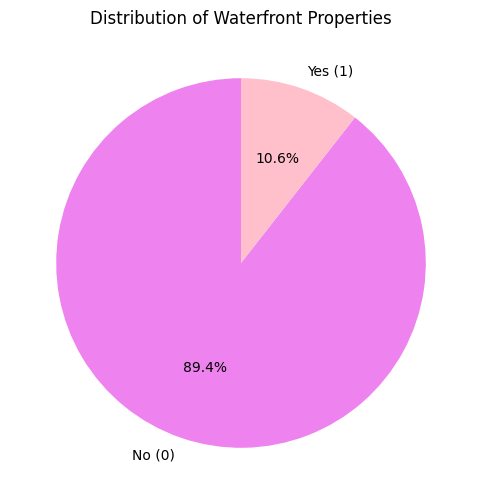

In [70]:
waterfront_counts = ds['has_attic'].value_counts().sort_index()
labels = ['No (0)', 'Yes (1)']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(waterfront_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['violet', 'pink'])
plt.title('Distribution of Waterfront Properties')
plt.show()

In [71]:
ds[['property_age', 'renovated', 'price_per_sqft', 'full_bathrooms', 'bathroom_fraction', 'quarter_bath', 'half_bath', 'three_quarter_bath', 'full_floor', 'has_attic']].describe()


,property_age,renovated,price_per_sqft,full_bathrooms,bathroom_fraction,quarter_bath,half_bath,three_quarter_bath,full_floor,has_attic
count,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,54.173554,12.395607,237.714403,1.789691,0.372064,0.127664,0.364506,0.210526,1.458678,0.105698
std,29.656387,20.266762,108.254198,0.751423,0.281269,0.333752,0.481344,0.407727,0.551788,0.307484
min,11.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,162.756498,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,49.000000,0.000000,220.468288,2.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,74.000000,22.000000,286.289306,2.000000,0.500000,0.000000,1.000000,0.000000,2.000000,0.000000
max,125.000000,113.000000,1964.196429,8.000000,0.750000,1.000000,1.000000,1.000000,3.000000,1.000000


## Hypothesis testing 

In [72]:
#T-Test Independent
from scipy.stats import ttest_ind

# Perform T-test
t_stat, p_val = ttest_ind(ds[ds['has_attic'] == 1]['price'],
                          ds[ds['has_attic'] == 0]['price'])

print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Result: Reject the null hypothesis – attic presence has a significant effect on price.")
else:
    print("Result: Failed to reject the null hypothesis – attic presence does not significantly affect price.")



T-statistic: 4.35, P-value: 0.0000
Result: Reject the null hypothesis – attic presence has a significant effect on price.


Notes :
 1. If p-value < 0.05, it means there is strong evidence that attic presence does affect price → we reject the null hypothesis.

 2. If p-value ≥ 0.05, we fail to reject the null → there’s no strong evidence of a price difference due to attic presence.

In [73]:
from scipy.stats import chi2_contingency
import pandas as pd

# Test 2: View vs Has Attic
contingency2 = pd.crosstab(ds['view'], ds['has_attic'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency2)

print("View vs Has Attic:")
print(f"Chi2: {chi2_2:.2f}, p-value: {p_2:.4f}")
if p_2 < 0.05:
    print("→ Reject the null hypothesis: There's a significant relationship.")
else:
    print("→ Fail to reject the null hypothesis: No significant relationship.")



View vs Has Attic:
Chi2: 6.33, p-value: 0.1761
→ Fail to reject the null hypothesis: No significant relationship.


## **Overall Insights from Analysis :**
### •	Homes in better condition (4–5) have higher prices.
### •	Higher view ratings are linked to increased property prices.
### •	Properties with 3 to 4 bedrooms show the best price-to-size ratio.
### •	More than 5 bedrooms do not significantly increase the price.
### •	Larger living area generally leads to higher prices, but with more variation.
### •	Medina has the highest average property prices, making it the most premium city in the dataset.
### •	98039 (Medina area) is the most expensive zip code with the highest average property price.
### •	Waterfront homes are significantly more expensive than non-waterfront ones.
### •	Top Configuration: The most frequent type of property is 4 bedrooms with 2.5 bathrooms (572 properties).


## **Recommendations :**
### •	Target Medina (98039) for premium property development due to its highest average prices.
### •	Focus on homes with 3–4 bedrooms, as they offer the best price-to-size ratio.
### •	Build or market waterfront properties, since they command significantly higher prices.
### •	Maintain or upgrade homes to condition ratings 4 or 5 to boost property value.
### •	Promote homes with good views, as higher view scores are linked to higher prices.


# **Linerar Regression**

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
A = df[['bedrooms']]
y = df['price']

In [76]:
A_train, A_test, y_train1, y_test1 = train_test_split(A, y, test_size=0.2, random_state=42)

In [77]:
model1 = LinearRegression()
model1.fit(A_train, y_train1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
y_predA = model1.predict(A_test)

In [79]:
A_r2 = r2_score(y_test1, y_predA)
A_mse = mean_squared_error(y_test1, y_predA)

In [81]:
print("\n=========================================\n\tBEDROOM vs PRICE\n=========================================\n")
print("R2 Score = ",A_r2)
print("MSE = ",A_mse)


	BEDROOM vs PRICE

R2 Score =  0.0041425000205871365
MSE =  1111541113079.3264
